### GRIP- The Spark Foundation

## DATA SCIENCE AND BUSINESS ANALYTICS - INTERNSHIP

### By Meghna Rose

### TASK 1 : Prediction using Supervised ML
#### predicting the percentage of student based on the number of study hours.

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### EXPLORING DATASET

In [4]:
data=pd.read_csv("http://bit.ly/w-data")
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#shape of data
print("shape:",data.shape)

shape: (25, 2)


In [7]:
#summary of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#Detecting missing values in data
data.isnull().any()

Hours     False
Scores    False
dtype: bool

In [10]:
# There is no missing values in dataset

### DATA VISUALIZATION

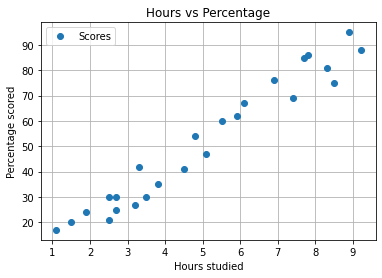

In [11]:
data.plot(x="Hours",y="Scores",xlabel="Hours studied",ylabel="Percentage scored",style='o')
plt.title("Hours vs Percentage")
plt.grid(True)
plt.show()

#### From the above graph we can clearly see that there is a positive linear relation between Hours studied and Percentage scored

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

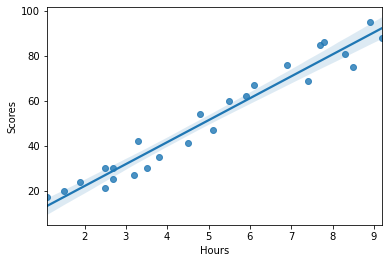

In [12]:
sns.regplot(x="Hours",y="Scores",data=data)

### DATA PREPARATON

In [14]:
# Next step is to divide the dta into "attributes"(inputs) and "labels"(outputs)
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [15]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### TRAINING THE MODEL

#### We have to train our data using linear regression algorithm and check values for test data

In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("Training complete")

Training complete


In [17]:
# Plot the regression line
line=regressor.coef_*X+regressor.intercept_

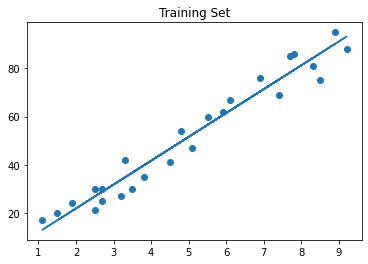

In [18]:
# Visualizing the training dataset
plt.scatter(X,y)
plt.title("Training Set")
plt.xlabel=("Hours")
plt.ylabel=("Scores")
plt.plot(X,line);
plt.show()

### MAKING PREDICTIONS 

#### We have done our model training. Now we need to make some predictions. 

In [19]:
print(X_test) #Testing data in hours
y_pred=regressor.predict(X_test) #predicting scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [20]:
# Comparing actua values vs predicted values
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
# Score for test data
accuracy=regressor.score(X_test,y_test)
print("Accuracy:",accuracy*100)

Accuracy: 94.54906892105356


#### What will be the predicted score if a student studies for 9.25 hours per day?

In [25]:
hours=[[9.25]]
pred=regressor.predict(hours)
print("Number of Hours = {} ".format(hours))
print("Predicted Score = {}".format(pred[0]))

Number of Hours = [[9.25]] 
Predicted Score = 93.69173248737538


#### According to regression, if a student studies for 9.25 hours per day, the score will be 93.69

### MODEL EVALUATION

#### In this step we need to evaluate the performance of algorithm. We can evaluate this by calculating the mean square error or mean absolute error

In [26]:
from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
print("Mean absolute Error: ",mean_abs_error)

Mean absolute Error:  4.183859899002975


#### Here the mean absolute error is small so our model is quite good 

### THANK YOU